In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from dotenv import dotenv_values

from census import Census
import json

In [2]:
config = dotenv_values(".env")

In [3]:
c = Census(config["CENSUS_API_KEY"])

In [4]:
tracts = gpd.read_file("../data/tracts_with_lands.shp.zip")

In [5]:
acs_variables = pd.DataFrame(json.load(open("../data/acs5_variables.json", 'rt'))["variables"]).transpose()
acs_variables.index = acs_variables.index.astype(str, copy=False)

In [6]:
def lookup_var(var):
    matches = acs_variables[acs_variables.index.str.match(var)]
    if matches.shape[0] == 0:
        matches = acs_variables.dropna(subset="concept")[acs_variables.concept.dropna().str.match(var)]
    if matches.shape[0] == 0:
        print("No match found.")
        return None
    return matches

def rename_cols(df):
    new_cols = []
    for col in df.columns:
        match = acs_variables[acs_variables.index.str.fullmatch(col)]
        if match.shape[0] > 0:
            new_cols.append(match["concept"][0])
        else:
            new_cols.append(col)
    df.columns = new_cols
    return df



In [7]:
me_census = pd.DataFrame.from_records(c.acs5.state_county_tract(fields = ('NAME', 'B01003_001E'),
                                      state_fips = "23",
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2019))

In [8]:
rename_cols(me_census)

,NAME,TOTAL POPULATION,state,county,tract
0,"Census Tract 24, Cumberland County, Maine",1274.0,23,005,002400
1,"Census Tract 32, Cumberland County, Maine",2984.0,23,005,003200
2,"Census Tract 40.01, Cumberland County, Maine",3223.0,23,005,004001
3,"Census Tract 37.01, Cumberland County, Maine",4182.0,23,005,003701
4,"Census Tract 42, Cumberland County, Maine",8447.0,23,005,004200
...,...,...,...,...,...
353,"Census Tract 9605, Piscataquis County, Maine",1834.0,23,021,960500
354,"Census Tract 9608, Piscataquis County, Maine",4043.0,23,021,960800
355,"Census Tract 9651, Hancock County, Maine",2008.0,23,009,965100
356,"Census Tract 9664, Hancock County, Maine",2342.0,23,009,966400


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


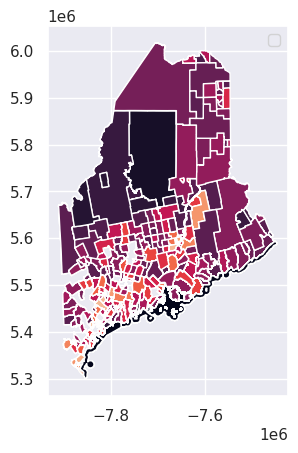

In [9]:
merge = tracts.merge(rename_cols(me_census), how="left", left_on="TRACTCE", right_on="tract")
ax = merge.plot("TOTAL POPULATION")

<AxesSubplot: xlabel='TOTAL POPULATION', ylabel='CALC_AC'>

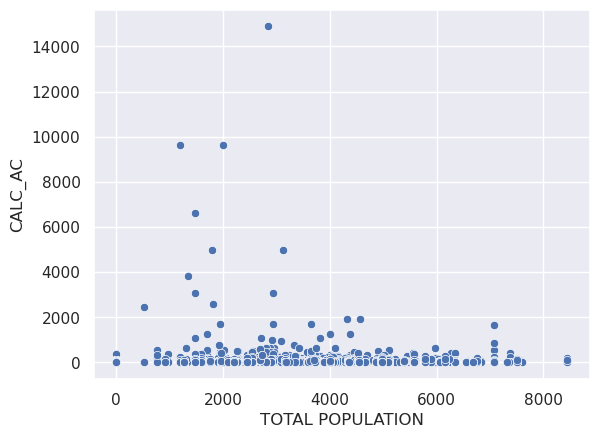

In [10]:
sns.scatterplot(merge, x="TOTAL POPULATION", y="CALC_AC")

In [11]:
cejst = gpd.read_file("../data/me.zip")

In [12]:
cejst.columns

Index(['GEOID10', 'SF', 'CF', 'DF_PFS', 'AF_PFS', 'HDF_PFS', 'DSF_PFS',
       'EBF_PFS', 'EALR_PFS', 'EBLR_PFS',
       ...
       'AGE_10', 'AGE_MIDDLE', 'AGE_OLD', 'TA_COU_116', 'TA_COUNT_C',
       'TA_PERC', 'TA_PERC_FE', 'UI_EXP', 'THRHLD', 'geometry'],
      dtype='object', length=124)

In [13]:
ejtracts = gpd.GeoDataFrame(tracts.groupby("GEOID").sum().merge(cejst, left_on="GEOID", right_on="GEOID10"))

/tmp/ipykernel_5597/1841659364.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ejtracts = gpd.GeoDataFrame(tracts.groupby("GEOID").sum().merge(cejst, left_on="GEOID", right_on="GEOID10"))


In [14]:
[print(x) for x in ejtracts.columns]

ALAND
AWATER
osmid_x
tract_osmi
land_osmid
trip_time
OBJECTID
ECO_RESERV
RPT_AC
CALC_AC
IUCN_STATU
CL_UNIQUEI
osmid_y
GEOID10
SF
CF
DF_PFS
AF_PFS
HDF_PFS
DSF_PFS
EBF_PFS
EALR_PFS
EBLR_PFS
EPLR_PFS
HBF_PFS
LLEF_PFS
LIF_PFS
LMI_PFS
PM25F_PFS
HSEF
P100_PFS
P200_I_PFS
AJDLI_ET
LPF_PFS
KP_PFS
NPL_PFS
RMP_PFS
TSDF_PFS
TPF
TF_PFS
UF_PFS
WF_PFS
UST_PFS
N_WTR
N_WKFC
N_CLT
N_ENY
N_TRN
N_HSG
N_PLN
N_HLTH
SN_C
SN_T
DLI
ALI
PLHSE
LMILHSE
ULHSE
EPL_ET
EAL_ET
EBL_ET
EB_ET
PM25_ET
DS_ET
TP_ET
LPP_ET
HRS_ET
KP_ET
HB_ET
RMP_ET
NPL_ET
TSDF_ET
WD_ET
UST_ET
DB_ET
A_ET
HD_ET
LLE_ET
UN_ET
LISO_ET
POV_ET
LMI_ET
IA_LMI_ET
IA_UN_ET
IA_POV_ET
TC
CC
IAULHSE
IAPLHSE
IALMILHSE
IALMIL_76
IAPLHS_77
IAULHS_78
LHE
IALHE
IAHSEF
N_CLT_EOMI
N_ENY_EOMI
N_TRN_EOMI
N_HSG_EOMI
N_PLN_EOMI
N_WTR_EOMI
N_HLTH_88
N_WKFC_89
FPL200S
N_WKFC_91
TD_ET
TD_PFS
FLD_PFS
WFR_PFS
FLD_ET
WFR_ET
ADJ_ET
IS_PFS
IS_ET
AML_ET
FUDS_RAW
FUDS_ET
IMP_FLG
DM_B
DM_AI
DM_A
DM_HI
DM_T
DM_W
DM_H
DM_O
AGE_10
AGE_MIDDLE
AGE_OLD
TA_COU_116
TA_COUNT_C
TA_PERC


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<AxesSubplot: xlabel='TC', ylabel='CALC_AC'>

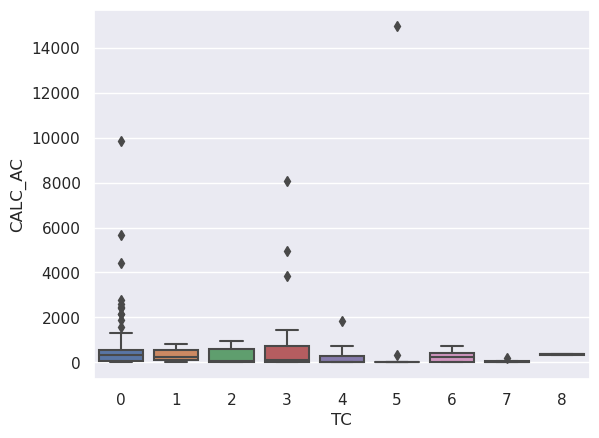

In [15]:
sns.boxplot(ejtracts, x="TC", y="CALC_AC")

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [17]:
pipe = make_pipeline(StandardScaler(), LinearRegression())

In [18]:
X = ejtracts["TC"].values.reshape(-1,1)
y = ejtracts["CALC_AC"]
pipe.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [19]:
pipe.score(X, y)

0.0004506475318036829

array([[<AxesSubplot: title={'center': 'TC'}>]], dtype=object)

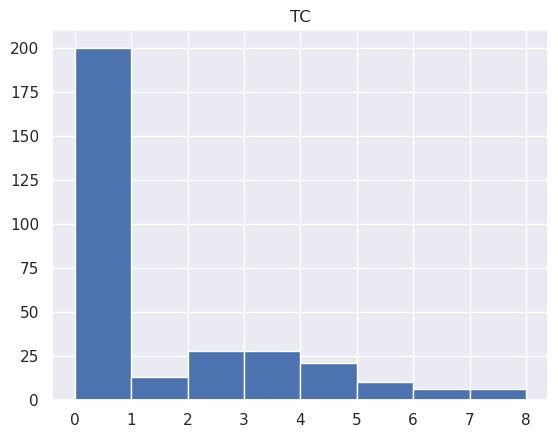

In [20]:
ejtracts.hist("TC", bins=ejtracts["TC"].max())

Zero Inflated Poisson distribution

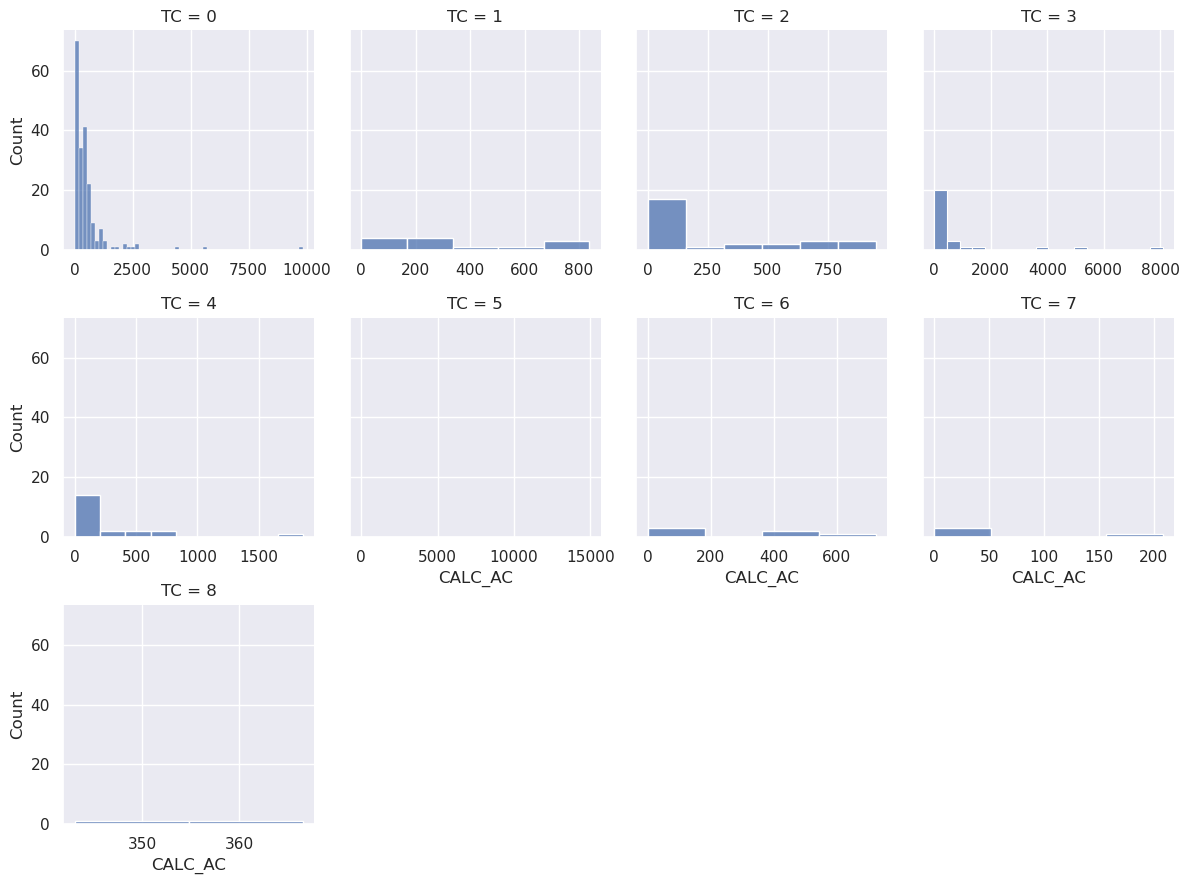

In [21]:
g = sns.FacetGrid(ejtracts, col="TC", col_wrap=4, sharex=False)
g.map(sns.histplot, "CALC_AC")